# Домашнее задание:
Решение ML-задачи Kaggle. DLS Осень 2022

Параева Елена

Stepik User ID: 508947197

Kaggle ник Elena_Paraeva

Kaggle best score 0.73275

# Первая часть. Исследование

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [231]:
data = pd.read_csv('./train.csv')

In [232]:
data.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [233]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# Все признаки
feature_cols = num_cols + cat_cols
# Таргет
target_col = 'Churn'

In [234]:
# Размерность датасета
data.shape

(5282, 20)

In [235]:
# Кол-во пустых значений в столбцах в процентах
nans = pd.DataFrame(data.isna().sum()*100//data.shape[0], columns = ['Кол-во пустых значений'])
nans

,Кол-во пустых значений
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных признаков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном графике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1. Анализ численных признаков

In [237]:
# Посмотрим на тип числовых признаков
for col in num_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].dtype)
    print()

ClientPeriod DISTRIBUTION
int64

MonthlySpending DISTRIBUTION
float64

TotalSpent DISTRIBUTION
object



In [238]:
# данные в TotalSpent не представлены в числовом виде
data['TotalSpent'].describe()

count     5282
unique    4978
top           
freq         9
Name: TotalSpent, dtype: object

In [239]:
# Заменим " " на 0 и пререведем данные в числовые
data['TotalSpent'].replace(' ', 0, inplace=True)
data["TotalSpent"] = pd.to_numeric(data["TotalSpent"])

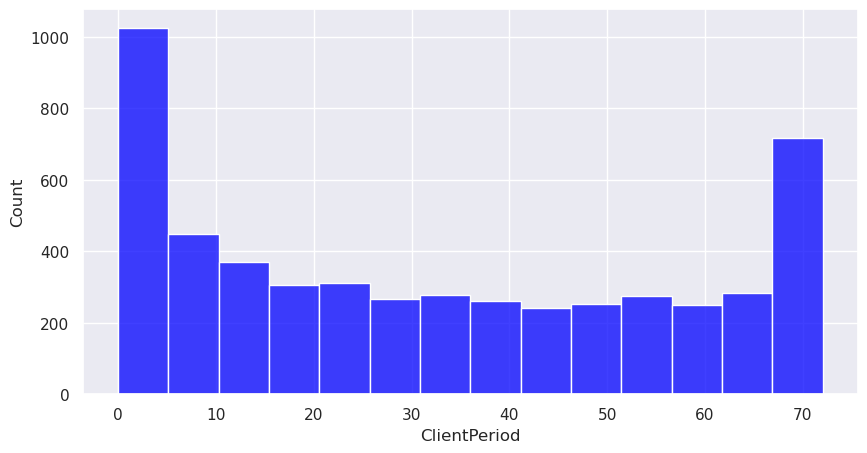

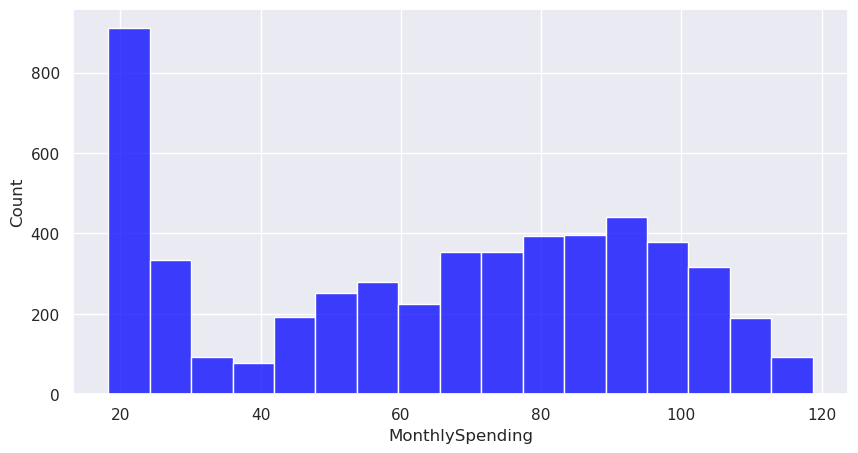

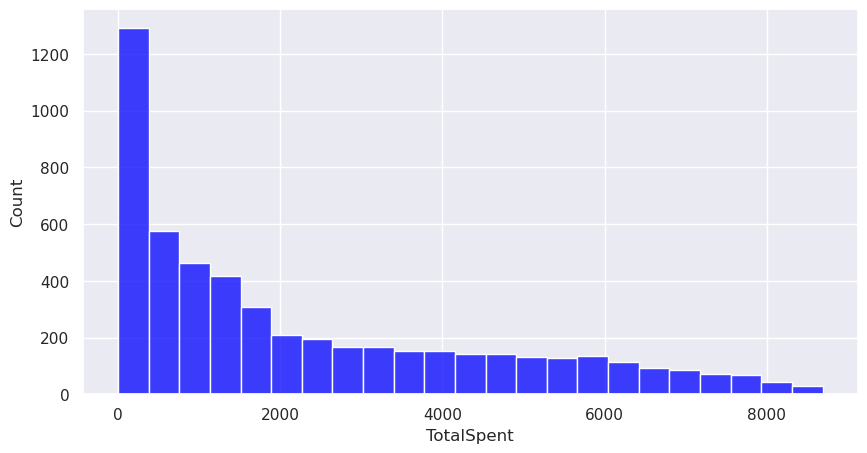

In [240]:
# Гистограммы численных признаков
sns.set(rc={'figure.figsize':(10,5)})
for i in num_cols:
    sns.histplot(data[i], color='blue');
    plt.show();

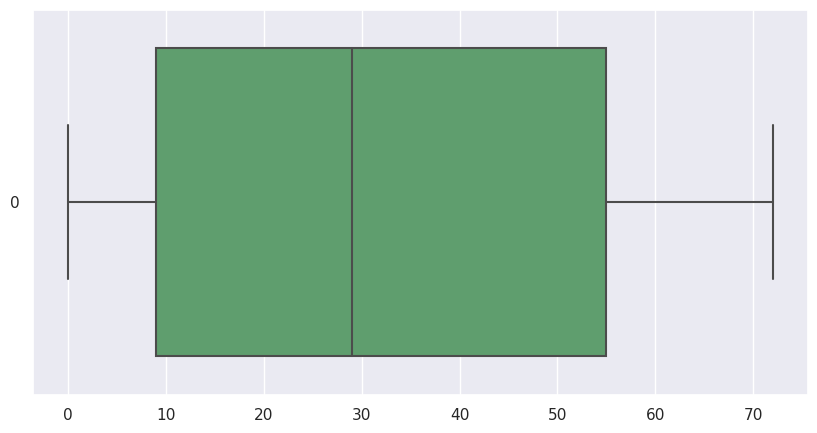

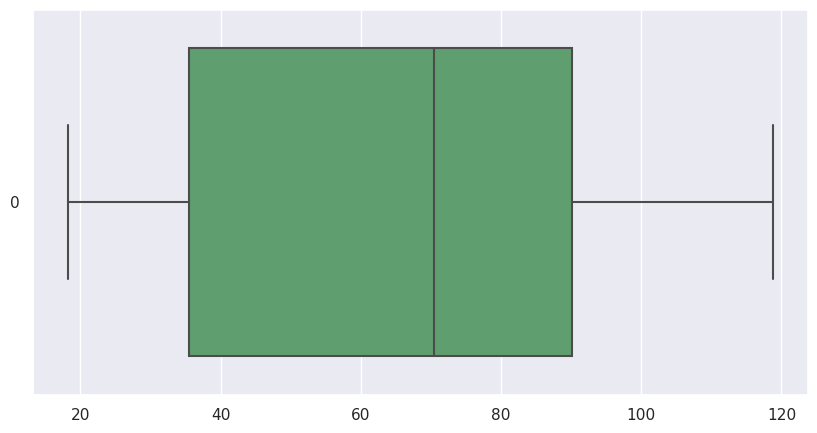

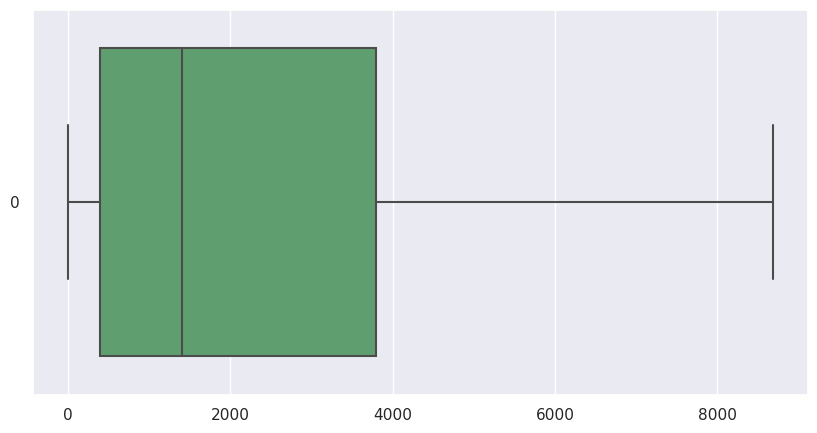

In [241]:
# Ящики с усами для численных признаков
for i in num_cols:
    sns.boxplot(data[i], color = 'g', orient='h');
    plt.show();

2. Анализ категориальных признаков

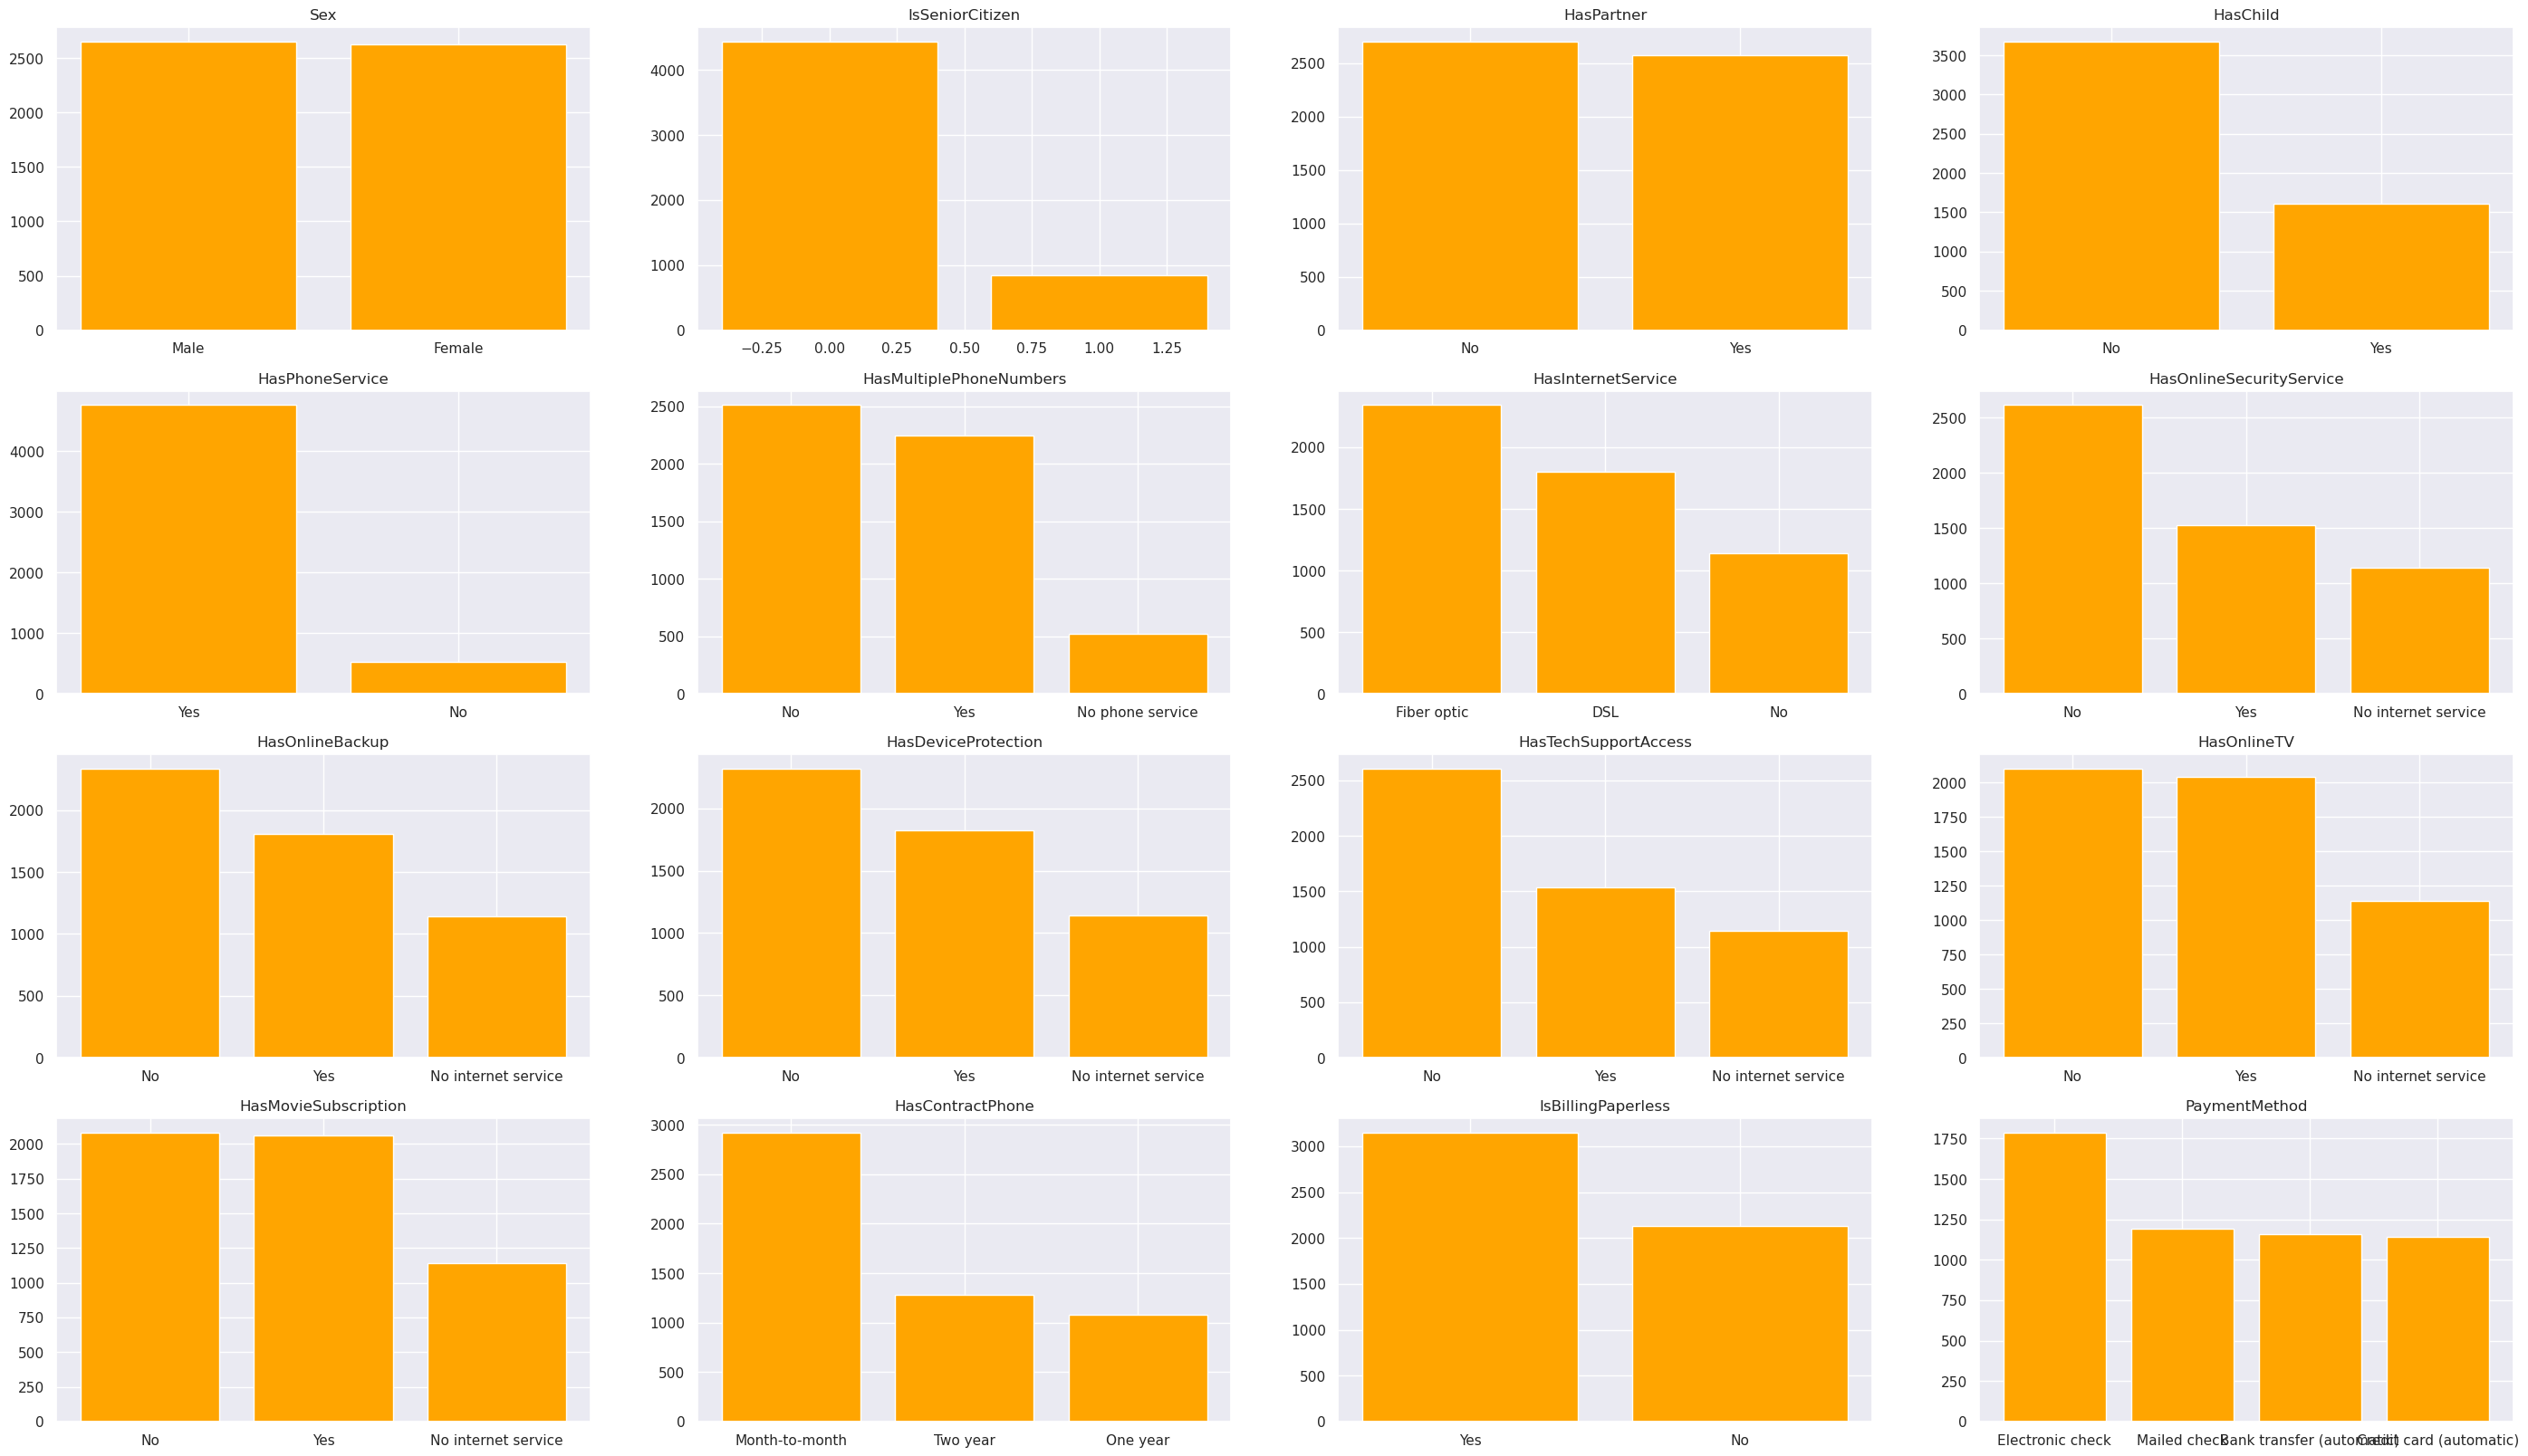

In [242]:
fig, ax = plt.subplots(4, 4, figsize=(35,20))
ax = ax.ravel()
for i, cat in enumerate(cat_cols):
    ax[i].set_title(cat)
    ax[i].bar(dict(data[cat].value_counts()).keys(), dict(data[cat].value_counts()).values(), color = 'orange')
fig.show();

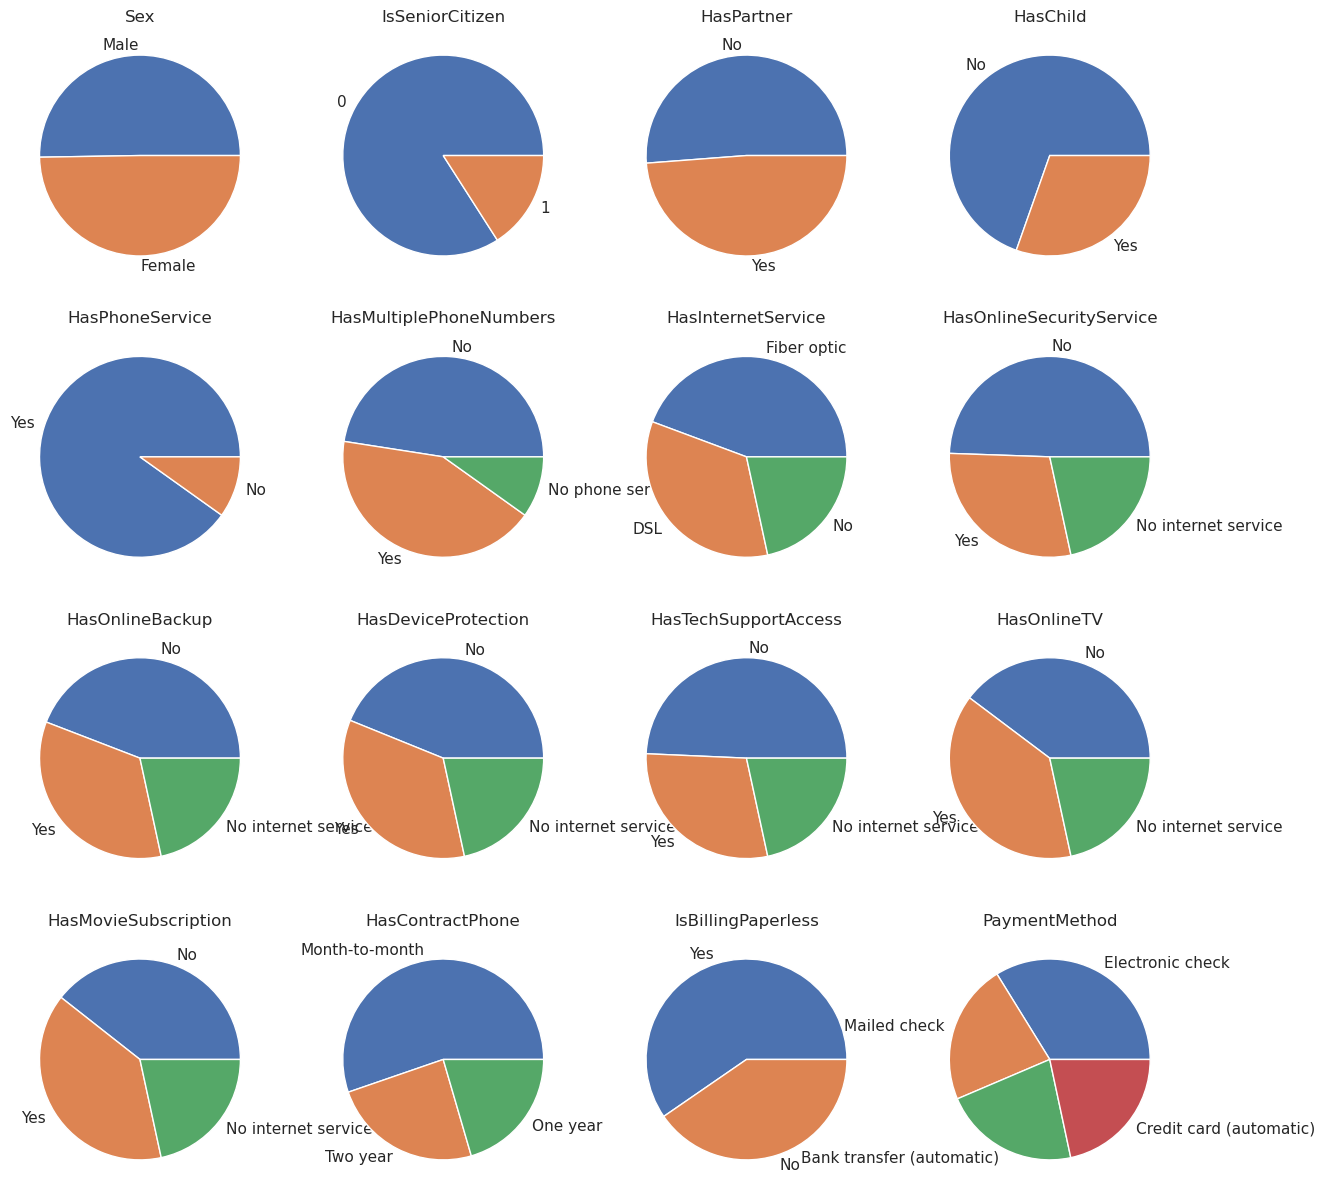

In [243]:
fig, ax = plt.subplots(4, 4, figsize=(15,15))
ax = ax.ravel()
for i, cat in enumerate(cat_cols):
    ax[i].set_title(cat)
    ax[i].pie(data[cat].value_counts().values, labels=dict(data[cat].value_counts()).keys())
fig.show();

3. Распределение целевой переменной

In [244]:
data[target_col]

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [245]:
data[target_col].value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

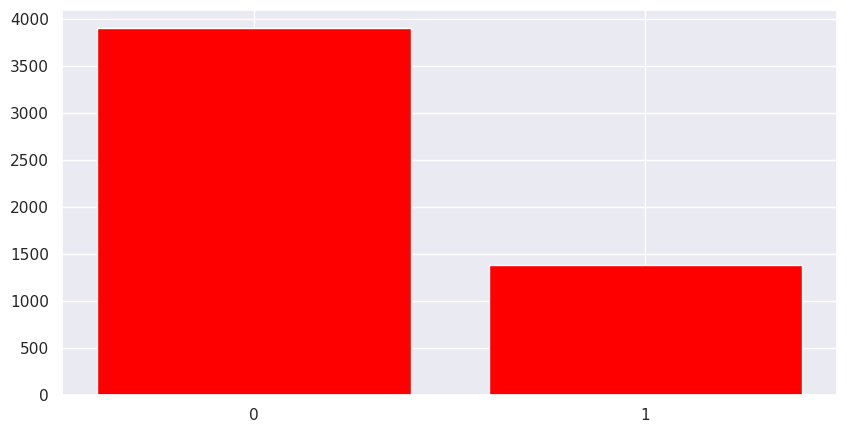

In [246]:
plt.bar(['0','1'], data[target_col].value_counts().values, color = 'red');

! Вывод - задача не сбалансирована

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

#### Оценка IV важности каждого признака (feature importance)

In [247]:
max_bin = 7
force_bin = 3

def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string
import warnings

warnings.warn('my warning')
final_iv, IV = data_vars(data[num_cols+cat_cols], data[target_col])

IV.sort_values(by='IV',ascending=False)

,VAR_NAME,IV
2,HasContractPhone,1.264242
0,ClientPeriod,0.775298
8,HasOnlineSecurityService,0.760764
12,HasTechSupportAccess,0.706738
4,HasInternetService,0.604117
7,HasOnlineBackup,0.541285
3,HasDeviceProtection,0.507224
16,PaymentMethod,0.449562
5,HasMovieSubscription,0.388658
9,HasOnlineTV,0.384598


In [248]:
feature_importance = ['Sex', 'HasPhoneService', 'HasMultiplePhoneNumbers']

#### Дисперсионный анализ ANOVA для категориальных признаков

In [249]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

d = dict()

for x in cat_cols:
    model = ols('Churn' + '~' + x, data = data).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model, typ=1) # ANOVA Test
    d[result_anova.index[0]] = result_anova.iloc[0, -1]
res_anova = pd.DataFrame(d.values(), columns = ['PR[>F]'], index = d.keys())

In [250]:
res_anova.sort_values(by='PR[>F]')

,PR[>F]
HasContractPhone,4.568625e-210
HasOnlineSecurityService,1.779840e-156
HasTechSupportAccess,4.746754e-144
HasInternetService,3.175884e-121
PaymentMethod,8.712000e-107
HasOnlineBackup,6.643236e-105
HasDeviceProtection,5.519640e-96
HasMovieSubscription,2.620346e-64
HasOnlineTV,3.356961e-63
IsBillingPaperless,5.598287e-46


In [251]:
res_anova[res_anova['PR[>F]']>=0.05]

,PR[>F]
Sex,0.545229
HasPhoneService,0.430523


In [252]:
anova = ['Sex', 'HasPhoneService']

#### Посмотрим на матрицу корреляции фичей

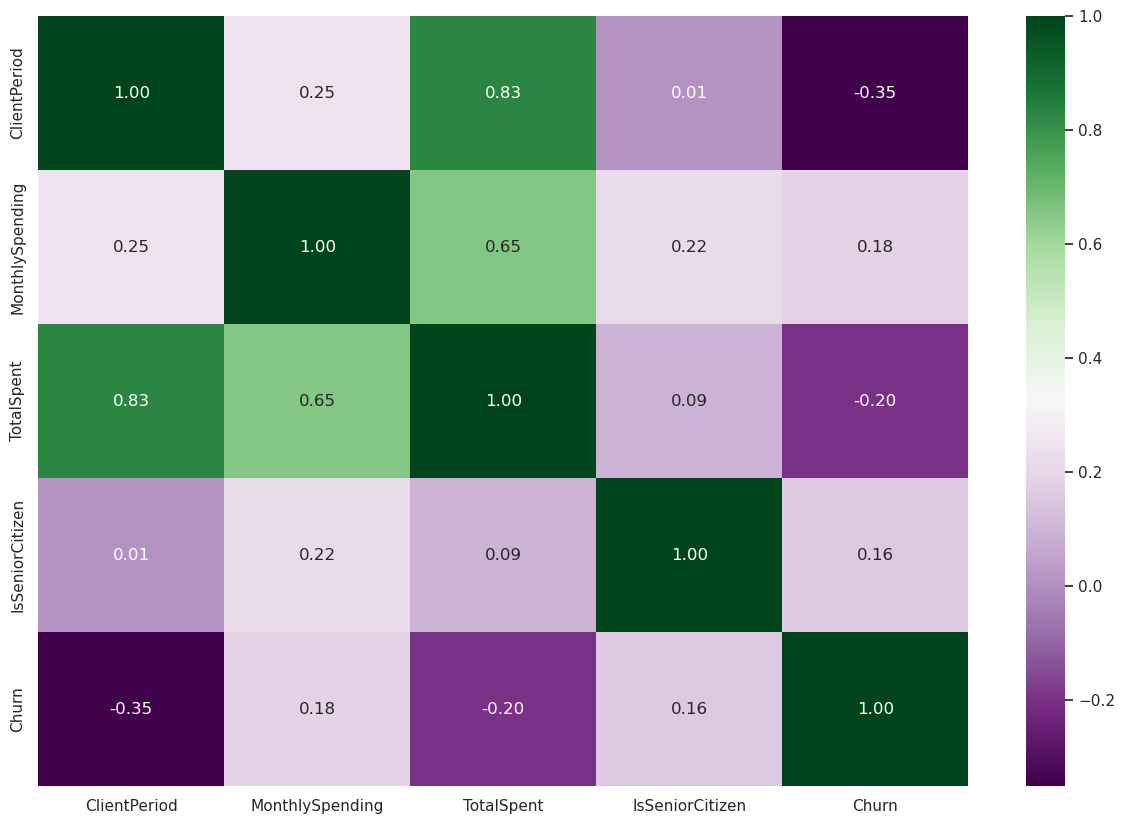

In [253]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.heatmap(ax=ax, 
            data=data.corr(), 
            annot = True, 
            cmap='PRGn', 
            fmt=".2f"
            )
fig.show();
# data.corr()

In [254]:
corr_features = ['TotalSpent', 'ClientPeriod']

In [324]:
# уберем дубликаты
data = data.drop_duplicates()
# Данные без предобработки с таргетом
Data = data.copy()
# target
y = data[target_col]
# Уберем из данных таргет
X = data.drop(target_col, axis=1)

In [325]:
X.shape, y.shape

((5268, 19), (5268,))

#### Permutation Importance для оценки важности признаков

In [279]:
# Разделение на train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    train_size=0.6,
                                                    random_state=42)

In [280]:
# Таргет энкодинг
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

encoder = TargetEncoder()
X_train_enc = encoder.fit_transform(X_train, y_train)
X_valid_enc = encoder.transform(X_valid)
scaler = StandardScaler()
X_train_enc[num_cols + cat_cols] = scaler.fit_transform(X_train_enc[num_cols + cat_cols])
X_valid_enc[num_cols + cat_cols] = scaler.transform(X_valid_enc[num_cols + cat_cols])

In [281]:
lr_perm = LogisticRegression(C=50, max_iter=50, penalty='l1', solver='liblinear')

lr_perm.fit(X_train_enc, y_train)

LogisticRegression(C=50, max_iter=50, penalty='l1', solver='liblinear')

In [282]:
import eli5
from eli5.sklearn import PermutationImportance

perm=PermutationImportance(lr_perm, random_state=42).fit(X_valid_enc, y_valid)
eli5.show_weights(perm, feature_names=X_valid_enc.columns.tolist())

Weight,Feature
0.1235 ± 0.0140,ClientPeriod
0.0325 ± 0.0102,TotalSpent
0.0116 ± 0.0083,HasInternetService
0.0098 ± 0.0121,HasContractPhone
0.0087 ± 0.0080,HasOnlineTV
0.0077 ± 0.0015,HasPhoneService
0.0054 ± 0.0037,IsBillingPaperless
0.0048 ± 0.0112,HasTechSupportAccess
0.0041 ± 0.0041,HasMovieSubscription
0.0032 ± 0.0037,HasMultiplePhoneNumbers


In [284]:
feature_weights = eli5.explain_weights_df(perm, feature_names=X_valid.columns.tolist())
# слабые фичи
permutation = feature_weights[feature_weights['weight'] < 0.0001]['feature'].tolist()
# Итого в результате анализа
permutation, feature_importance, anova, corr_features

(['Sex',
  'HasPartner',
  'HasOnlineBackup',
  'MonthlySpending',
  'HasDeviceProtection',
  'PaymentMethod'],
 ['Sex', 'HasPhoneService', 'HasMultiplePhoneNumbers'],
 ['Sex', 'HasPhoneService'],
 ['TotalSpent', 'ClientPeriod'])

Новые признаки и удаление

In [326]:
X_clean = data.drop(target_col, axis=1)
# Data - вместе с таргетом

In [329]:
X.shape

(5268, 20)

In [599]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

# Все признаки
feature_cols = num_cols + cat_cols
# Таргет
target_col = 'Churn'

In [600]:
# удаление столбцов
useless_columns = ['Sex', 'TotalSpent', 'HasPhoneService']
# useless_columns = []
# update lists
num_cols = [i for i in num_cols if i not in useless_columns]
cat_cols = [i for i in cat_cols if i not in useless_columns]
feature_cols = num_cols + cat_cols
num_cols, cat_cols

(['ClientPeriod', 'MonthlySpending'],
 ['IsSeniorCitizen',
  'HasPartner',
  'HasChild',
  'HasMultiplePhoneNumbers',
  'HasInternetService',
  'HasOnlineSecurityService',
  'HasOnlineBackup',
  'HasDeviceProtection',
  'HasTechSupportAccess',
  'HasOnlineTV',
  'HasMovieSubscription',
  'HasContractPhone',
  'IsBillingPaperless',
  'PaymentMethod'])

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно использовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [601]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

1. Предобработка для LogisticRegression

In [602]:
# Разделение на train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    random_state=42)
# выкидываем ненужные столбцы
df_train = X_train.drop(useless_columns, axis=1)
df_valid = X_valid.drop(useless_columns, axis=1)

# >>> df_train, y_train
# >>> df_valid, y_valid

In [616]:
# Без разделения на валидационную часть
X_cv = X.drop(useless_columns, axis=1)
scaler1 = StandardScaler()
# One Hot Encoder
X_cv_oh = pd.get_dummies(X_cv, columns=cat_cols)
cat_cols_onehot = [i for i in list(X_cv_oh.columns) if i not in num_cols]
X_cv_oh[num_cols+cat_cols_onehot] = scaler1.fit_transform(X_cv_oh[num_cols+cat_cols_onehot])
#>>> X_cv_oh, y
# Target Encoder
encoder = TargetEncoder(cols=cat_cols)
scaler2 = StandardScaler()
X_cv_target = encoder.fit_transform(X_cv, y)
X_cv_target[num_cols+cat_cols] = scaler2.fit_transform(X_cv_target[num_cols+cat_cols])
# >>> X_cv_target, y

In [617]:
# One Hot Encoding(разделяем выборку)
df_train_oh = pd.get_dummies(df_train, columns=cat_cols)
df_valid_oh = pd.get_dummies(df_valid, columns=cat_cols)
cat_cols_onehot = [i for i in list(df_train_oh.columns) if i not in num_cols]
scaler3 = StandardScaler()
df_train_oh[num_cols+cat_cols_onehot] = scaler3.fit_transform(df_train_oh[num_cols+cat_cols_onehot])
df_valid_oh[num_cols+cat_cols_onehot] = scaler3.transform(df_valid_oh[num_cols+cat_cols_onehot])
# >>> df_train_oh, y_train
# >>> df_valid_oh, y_valid

In [609]:
cls = make_pipeline(
    TargetEncoder(cols=cat_cols),
    StandardScaler(),
#     RobustScaler(),
#     MinMaxScaler(),
    LogisticRegression()
)

# # Если OneHotEncoding
# cls = cls.fit(df_train_oh, y_train)
# cls_preds = cls.predict(df_valid_oh)
# cls_preds_proba = cls.predict_proba(df_valid_oh)[:, 1]
# print('roc_auc на обучающей выборке =', roc_auc_score(y_train, cls.predict_proba(df_train_oh)[:, 1]))
# print('roc_auc на валидационной выборке =', roc_auc_score(y_valid, cls_preds_proba))

# Если targetEncoding
cls = cls.fit(df_train, y_train)
cls_preds = cls.predict(df_valid)
cls_preds_proba = cls.predict_proba(df_valid)[:, 1]
print('roc_auc на обучающей выборке =', roc_auc_score(y_train, cls.predict_proba(df_train)[:, 1]))
print('roc_auc на валидационной выборке =', roc_auc_score(y_valid, cls_preds_proba))

roc_auc на обучающей выборке = 0.844640865258325
roc_auc на валидационной выборке = 0.8378756143761944


2. LogisticRegressionСV

In [610]:
# словарь моделей и метрик
scores = {}

In [675]:
from sklearn.compose import make_column_transformer

preprocess = make_column_transformer((TargetEncoder(), cat_cols), (StandardScaler(), num_cols))

# Логистическая регрессия CV
cs = (0.001, 0.01, 0.1, 0.5, 1, 5, 10, 30, 50, 80, 100)
lr_cv = LogisticRegressionCV(Cs=cs, 
                             scoring='roc_auc', 
                             refit=True, 
                             cv=6, 
                             penalty='l2',
                             solver = 'liblinear',
#                            l1_ratios = [0.1, 0.3, 0.6, 0.8],
                             n_jobs = -1,
                             random_state = 42)

cls = make_pipeline(
#     TargetEncoder(cols=cat_cols),
#     StandardScaler(),
#     RobustScaler(),
#     MinMaxScaler(),
    preprocess,
    lr_cv
)

# Если OneHotEncoding
# cls = cls.fit(df_train_oh, y_train)
# cls_preds = cls.predict(df_valid_oh)
# cls_preds_proba = cls.predict_proba(df_valid_oh)[:, 1]
# print('roc_auc на обучающей выборке =', roc_auc_score(y_train, cls.predict_proba(df_train_oh)[:, 1]))
# print('roc_auc на валидационной выборке =', roc_auc_score(y_valid, cls_preds_proba))

# Если targetEncoding
cls = cls.fit(df_train, y_train)
cls_preds = cls.predict(df_valid)
# cls_preds_proba = cls.predict_proba(df_valid)[:, 1]
# print('roc_auc на обучающей выборке =', roc_auc_score(y_train, cls.predict_proba(df_train)[:, 1]))
# print('roc_auc на валидационной выборке =', roc_auc_score(y_valid, cls_preds_proba))
print(f'Roc_auc на обучающей выборке {cls.score(df_train, y_train)}')
print(f'Roc_auc на валидационной выборке {cls.score(df_valid, y_valid)}')
print(f'Коэффициент С = {lr_cv.C_[0]}')
# scores['lr_cv'] = cls.score(df_valid, y_valid)
# pipeline
# pipe = Pipeline([('encoder', TargetEncoder(cols=cat_cols)), ('lr_cv', lr_cv)])
# pipe.fit(df_train, y_train)
# pipe.score(df_valid, y_valid)

Roc_auc на обучающей выборке 0.844629063512428
Roc_auc на валидационной выборке 0.8378255463671488
Коэффициент С = 5.0


In [612]:
# cls.get_params(deep=False)

3. Поиск наилучших гиперпараметров и кросс-валидация

In [615]:
# Кросс-валидация. Поиск оптимального гиперпараметра С
from sklearn.model_selection import cross_val_score
sc = {}
for i in cs:
    cross_val_scores = cross_val_score(LogisticRegression(C = i), 
                                       X_cv_oh, 
                                       y, 
                                       cv=5, 
                                       scoring='roc_auc')
    sc[f'{np.mean(cross_val_scores)}'] = i
#     sc.append((np.mean(cross_val_scores), i))
    print(f'C = {i}, score = {list(sc.keys())[-1]}')

# sc = dict(sc)
print(f'Вывод: лучший коэффициент C равен {sc[max(sc)]}')

C = 0.001, score = 0.8354693897488706
C = 0.01, score = 0.8421030626695252
C = 0.1, score = 0.8427357670916773
C = 1, score = 0.8427345488667418
C = 5, score = 0.8426923479769426
C = 15, score = 0.8427446972171232
C = 30, score = 0.8427605517295632
C = 50, score = 0.8427671180093513
C = 80, score = 0.8427587064140993
C = 100, score = 0.8427596482192324
Вывод: лучший коэффициент C равен 50


Вывод
С = 50 для дефолтных параметров линейной регрессии при использовании One Hot Encoding

In [618]:
lr = LogisticRegression(penalty='l2', # наличие регуляризации и её вид
dual=False, # двоичная/первичная формулировка(имеет смысл при l2 и liblinear, объекты<признаки
tol=0.0001, # критерий остановки
C=30, # относит. сила регуляризации (default=1). Чем меньше, тем больше регуляризация
fit_intercept=True, # следует ли добавлять смещение bias
intercept_scaling=1, # для liblinear & fit_int=True, масштаб bias
class_weight=None, # веса, относящиеся к каждому классу(default=None)
random_state=None, # какой генератор псевдослуч чисел использовать
solver='lbfgs', # алгоритм оптимизации(решатель для подбора модели)
max_iter=100, # количество итераций при подгонке модели
multi_class='auto', # подход к использованию нескольких классов
verbose=0, # степень детализации при liblinear и lbfgs
warm_start=False, # следует ли повторно использовать ранее полученное решение
n_jobs=-1, # использование ядер. При (-1) использует все доступные ядра
l1_ratio=None # плавающее число точек от нуля до единицы, либо None (по умолчанию). 
# Оно определяет относительную важность части L1 в регуляризации elastic-net.
)

lr.fit(df_train_oh, y_train)

LogisticRegression(C=30, n_jobs=-1)

In [619]:
lr_preds = lr.predict(df_train_oh)
lr_preds_proba = lr.predict_proba(df_train_oh)[:, 1]
# Метрика на трейне
print('roc_auc', roc_auc_score(y_train, lr_preds_proba))

lr_preds = lr.predict(df_valid_oh)
lr_preds_proba = lr.predict_proba(df_valid_oh)[:, 1]
# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, lr_preds_proba))
# добавляем в словарь
scores['lr'] = roc_auc_score(y_valid, lr_preds_proba)

roc_auc 0.8483233906796662
roc_auc 0.8380237322362877


In [661]:
scores

{'lr_cv': 0.8382219181054266, 'lr': 0.8380237322362877}

In [662]:
# попробуем с помощью пайплана сделать
from sklearn.compose import make_column_transformer

preprocess = make_column_transformer((OneHotEncoder(), cat_cols), (StandardScaler(), num_cols))
model = make_pipeline(preprocess, LogisticRegression())

model.fit(df_train, y_train)
preds = model.predict_proba(df_valid)[:,1]
print(roc_auc_score(y_valid, preds))
# preds.shape, y_valid.shape
# model.score(df_valid, y_valid)
scores['model'] = roc_auc_score(y_valid, preds)

0.8402580171399484


In [664]:
gs = make_pipeline(preprocess, LogisticRegression())

from sklearn.model_selection import KFold

# Поиск по сетке
param_grid = {
    "logisticregression__penalty": ['l2', 'l1'], # норма штрафа
    "logisticregression__tol": [0.0001, 0.001, 0.01], # критерий остановки
    "logisticregression__C": cs, # обратная сила регуляризации
    "logisticregression__fit_intercept": [True], # следует ли добавлять константу
    "logisticregression__class_weight": [None], # веса
    "logisticregression__solver": ['liblinear', 'saga'], # алгоритм оптимизации
    "logisticregression__max_iter": [100, 150, 50], # количество итераций
    "logisticregression__warm_start": [True, False], # использование решения предыдущего шага
    'logisticregression__multi_class': ['auto'] # бинарная классификация
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42) # пять фолдов с валидацией и перемешиванием
CV_lr = GridSearchCV(estimator=gs, 
                     param_grid=param_grid, 
                     scoring='roc_auc',
                     cv=kfold, 
                     verbose = 1000) # verbose - будем печатать вывод полностью
CV_lr.fit(X_cv, y)
CV_lr.best_score_, CV_lr.best_params_ , CV_lr.best_estimator_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV 1/5; 1/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 1/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.836 total time=   0.0s
[CV 2/5; 1/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__pen

[CV 5/5; 3/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 1/5; 4/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 4/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__

[CV 4/5; 6/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.864 total time=   0.1s
[CV 5/5; 6/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 5/5; 6/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__t

[CV 1/5; 9/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.835 total time=   0.1s
[CV 2/5; 9/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 9/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logis

[CV 3/5; 11/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.834 total time=   0.1s
[CV 4/5; 11/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 11/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logis

[CV 4/5; 14/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.500 total time=   0.0s
[CV 5/5; 14/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 14/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregres

[CV 1/5; 17/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.500 total time=   0.0s
[CV 2/5; 17/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 17/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__

[CV 3/5; 19/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.500 total time=   0.0s
[CV 4/5; 19/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 4/5; 19/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001,

[CV 5/5; 22/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.500 total time=   0.0s
[CV 1/5; 23/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 23/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, log

[CV 2/5; 25/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.831 total time=   0.0s
[CV 3/5; 25/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 25/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregressi

[CV 5/5; 27/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 1/5; 28/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 28/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregressio

[CV 2/5; 30/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.831 total time=   0.0s
[CV 3/5; 30/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 30/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression

[CV 5/5; 32/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.832 total time=   0.1s
[CV 1/5; 33/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 33/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, 

[CV 3/5; 35/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 4/5; 35/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 35/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logis

[CV 4/5; 38/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.500 total time=   0.0s
[CV 5/5; 38/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 38/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregres

[CV 1/5; 41/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.500 total time=   0.0s
[CV 2/5; 41/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 41/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__

[CV 2/5; 44/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.500 total time=   0.0s
[CV 3/5; 44/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 44/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.000

[CV 4/5; 46/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.500 total time=   0.0s
[CV 5/5; 46/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 46/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, 

[CV 1/5; 49/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.836 total time=   0.0s
[CV 2/5; 49/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 49/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression_

[CV 4/5; 51/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.864 total time=   0.0s
[CV 5/5; 51/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 51/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__t

[CV 3/5; 54/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 4/5; 54/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 54/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__t

[CV 1/5; 57/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.835 total time=   0.0s
[CV 2/5; 57/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 57/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logis

[CV 3/5; 59/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.834 total time=   0.0s
[CV 4/5; 59/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 59/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logistic

[CV 3/5; 62/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.500 total time=   0.0s
[CV 4/5; 62/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 62/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregressio

[CV 2/5; 65/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.500 total time=   0.0s
[CV 3/5; 65/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 3/5; 65/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 4/5; 67/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.500 total time=   0.0s
[CV 5/5; 67/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 5/5; 67/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, lo

[CV 1/5; 70/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.500 total time=   0.0s
[CV 2/5; 70/720] START logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 70/720] END logisticregression__C=0.001, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, log

[CV 3/5; 73/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.838 total time=   0.0s
[CV 4/5; 73/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 4/5; 73/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression_

[CV 1/5; 76/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.841 total time=   0.0s
[CV 2/5; 76/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 76/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression_

[CV 3/5; 78/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.838 total time=   0.0s
[CV 4/5; 78/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 78/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__t

[CV 1/5; 81/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.841 total time=   0.1s
[CV 2/5; 81/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 81/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logis

[CV 4/5; 83/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.867 total time=   0.0s
[CV 5/5; 83/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 83/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logistic

[CV 1/5; 87/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.820 total time=   0.0s
[CV 2/5; 87/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 87/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__t

[CV 3/5; 89/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.808 total time=   0.0s
[CV 4/5; 89/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 89/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 1/5; 92/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.831 total time=   0.1s
[CV 2/5; 92/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 92/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, 

[CV 1/5; 95/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.831 total time=   0.0s
[CV 2/5; 95/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 95/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logistic

[CV 5/5; 97/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 1/5; 98/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 1/5; 98/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression

[CV 2/5; 100/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 100/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 100/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregressi

[CV 4/5; 102/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.868 total time=   0.0s
[CV 5/5; 102/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 5/5; 102/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression

[CV 1/5; 105/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.841 total time=   0.1s
[CV 2/5; 105/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 105/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, lo

[CV 4/5; 107/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.867 total time=   0.0s
[CV 5/5; 107/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 107/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logis

[CV 1/5; 111/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.820 total time=   0.0s
[CV 2/5; 111/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 111/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression

[CV 5/5; 113/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.813 total time=   0.0s
[CV 1/5; 114/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 114/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression_

[CV 2/5; 116/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.814 total time=   0.1s
[CV 3/5; 116/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 116/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.000

[CV 2/5; 119/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.814 total time=   0.1s
[CV 3/5; 119/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 3/5; 119/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logis

[CV 4/5; 122/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.867 total time=   0.0s
[CV 5/5; 122/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 122/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregressio

[CV 3/5; 125/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.838 total time=   0.0s
[CV 4/5; 125/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 125/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 2/5; 128/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.833 total time=   0.1s
[CV 3/5; 128/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 128/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, 

[CV 5/5; 130/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.833 total time=   0.1s
[CV 1/5; 131/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 131/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logist

[CV 2/5; 134/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.807 total time=   0.0s
[CV 3/5; 134/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 134/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregressio

[CV 1/5; 137/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.821 total time=   0.0s
[CV 2/5; 137/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 137/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 3/5; 139/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.827 total time=   0.1s
[CV 4/5; 139/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 4/5; 139/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, lo

[CV 5/5; 141/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.822 total time=   0.1s
[CV 1/5; 142/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 142/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logi

[CV 3/5; 144/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.827 total time=   0.0s
[CV 4/5; 144/720] START logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 144/720] END logisticregression__C=0.01, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logist

[CV 5/5; 146/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.831 total time=   0.0s
[CV 1/5; 147/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 147/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression_

[CV 4/5; 149/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.869 total time=   0.0s
[CV 5/5; 149/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 149/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 2/5; 152/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.1s
[CV 3/5; 152/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 152/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, 

[CV 1/5; 155/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 155/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 155/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logistic

[CV 1/5; 158/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.841 total time=   0.0s
[CV 2/5; 158/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 158/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregressio

[CV 4/5; 161/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.870 total time=   0.0s
[CV 5/5; 161/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 161/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 2/5; 164/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.833 total time=   0.1s
[CV 3/5; 164/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 164/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, 

[CV 5/5; 166/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.831 total time=   0.1s
[CV 1/5; 167/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 167/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logist

[CV 2/5; 169/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 3/5; 169/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 169/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression_

[CV 5/5; 171/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.831 total time=   0.0s
[CV 1/5; 172/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 172/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__

[CV 3/5; 174/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.839 total time=   0.0s
[CV 4/5; 174/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 174/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__t

[CV 2/5; 177/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.834 total time=   0.1s
[CV 3/5; 177/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 177/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logis

[CV 2/5; 180/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 180/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 180/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logist

[CV 4/5; 183/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.869 total time=   0.0s
[CV 5/5; 183/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 183/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__t

[CV 2/5; 186/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 186/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 186/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__t

[CV 4/5; 188/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.870 total time=   0.1s
[CV 5/5; 188/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 188/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, 

[CV 1/5; 191/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 191/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 191/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logistic

[CV 2/5; 194/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 194/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 194/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__

[CV 5/5; 196/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.831 total time=   0.0s
[CV 1/5; 197/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 197/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 2/5; 199/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.1s
[CV 3/5; 199/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 199/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 5/5; 201/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.831 total time=   0.1s
[CV 1/5; 202/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 202/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisti

[CV 1/5; 205/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.841 total time=   0.0s
[CV 2/5; 205/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 205/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 2/5; 208/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 208/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 208/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 4/5; 210/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.870 total time=   0.0s
[CV 5/5; 210/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 5/5; 210/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=

[CV 1/5; 213/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 213/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 213/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 4/5; 215/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.870 total time=   0.1s
[CV 5/5; 215/720] START logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 215/720] END logisticregression__C=0.1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticreg

[CV 3/5; 218/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.839 total time=   0.0s
[CV 4/5; 218/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 218/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 5/5; 221/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 222/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 222/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01

[CV 2/5; 224/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.833 total time=   0.2s
[CV 3/5; 224/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 224/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logist

[CV 5/5; 226/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 227/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 227/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 2/5; 229/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.1s
[CV 3/5; 229/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 229/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 5/5; 231/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.830 total time=   0.1s
[CV 1/5; 232/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 232/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 1/5; 235/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 235/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 235/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logistic

[CV 5/5; 237/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.830 total time=   0.1s
[CV 1/5; 238/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 238/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticre

[CV 3/5; 240/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.840 total time=   0.1s
[CV 4/5; 240/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 240/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 2/5; 243/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 3/5; 243/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 243/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 5/5; 245/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 246/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 246/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01

[CV 2/5; 248/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.833 total time=   0.3s
[CV 3/5; 248/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 248/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logist

[CV 5/5; 250/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 251/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 251/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 3/5; 253/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.839 total time=   0.0s
[CV 4/5; 253/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 4/5; 253/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 2/5; 256/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 256/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 256/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 4/5; 258/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.869 total time=   0.0s
[CV 5/5; 258/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 5/5; 258/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 1/5; 261/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 261/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 261/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticreg

[CV 5/5; 263/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.1s
[CV 1/5; 264/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 264/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregre

[CV 2/5; 266/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 266/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 266/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 4/5; 268/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.870 total time=   0.0s
[CV 5/5; 268/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 268/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.00

[CV 1/5; 271/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 271/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 271/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticreg

[CV 3/5; 273/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.839 total time=   0.1s
[CV 4/5; 273/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 273/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregres

[CV 1/5; 276/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.843 total time=   0.1s
[CV 2/5; 276/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 276/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregress

[CV 5/5; 278/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 279/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 279/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.00

[CV 2/5; 282/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 282/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 282/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, 

[CV 5/5; 284/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 285/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 285/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregr

[CV 3/5; 287/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.840 total time=   0.1s
[CV 4/5; 287/720] START logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 287/720] END logisticregression__C=1, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregressio

[CV 2/5; 290/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 290/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 290/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 4/5; 292/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.870 total time=   0.0s
[CV 5/5; 292/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 292/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 1/5; 295/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.843 total time=   0.2s
[CV 2/5; 295/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 295/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logistic

[CV 3/5; 297/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.2s
[CV 4/5; 297/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 297/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticreg

[CV 2/5; 300/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.834 total time=   0.1s
[CV 3/5; 300/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 300/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 4/5; 302/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.870 total time=   0.1s
[CV 5/5; 302/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 302/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 2/5; 305/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 3/5; 305/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 3/5; 305/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01,

[CV 4/5; 307/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.870 total time=   0.2s
[CV 5/5; 307/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 5/5; 307/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logistic

[CV 1/5; 310/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.843 total time=   0.2s
[CV 2/5; 310/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 310/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticr

[CV 4/5; 312/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.870 total time=   0.1s
[CV 5/5; 312/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 5/5; 312/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 1/5; 316/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.843 total time=   0.0s
[CV 2/5; 316/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 316/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 4/5; 318/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.869 total time=   0.0s
[CV 5/5; 318/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 5/5; 318/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 2/5; 321/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.834 total time=   0.2s
[CV 3/5; 321/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 321/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticreg

[CV 1/5; 324/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.843 total time=   0.1s
[CV 2/5; 324/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 324/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 3/5; 326/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.839 total time=   0.2s
[CV 4/5; 326/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 326/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 4/5; 329/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.869 total time=   0.0s
[CV 5/5; 329/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 329/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01,

[CV 1/5; 332/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.843 total time=   0.3s
[CV 2/5; 332/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 332/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logist

[CV 3/5; 334/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.839 total time=   0.3s
[CV 4/5; 334/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 4/5; 334/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticr

[CV 4/5; 337/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.870 total time=   0.0s
[CV 5/5; 337/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 5/5; 337/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.00

[CV 4/5; 340/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.870 total time=   0.0s
[CV 5/5; 340/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 340/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.00

[CV 1/5; 343/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 343/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 343/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticreg

[CV 3/5; 345/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.839 total time=   0.1s
[CV 4/5; 345/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 345/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregres

[CV 1/5; 348/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.843 total time=   0.1s
[CV 2/5; 348/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 348/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregress

[CV 3/5; 350/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.839 total time=   0.2s
[CV 4/5; 350/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 350/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 5/5; 353/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 354/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 354/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, l

[CV 2/5; 356/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.1s
[CV 3/5; 356/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 356/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticr

[CV 4/5; 358/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.870 total time=   0.2s
[CV 5/5; 358/720] START logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 358/720] END logisticregression__C=5, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregr

[CV 3/5; 361/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.840 total time=   0.0s
[CV 4/5; 361/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 4/5; 361/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__to

[CV 5/5; 363/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 364/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 364/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 3/5; 366/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.839 total time=   0.0s
[CV 4/5; 366/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 366/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 1/5; 369/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.842 total time=   0.2s
[CV 2/5; 369/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 369/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 5/5; 371/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.1s
[CV 1/5; 372/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 372/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticre

[CV 2/5; 374/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.2s
[CV 3/5; 374/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 374/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__

[CV 5/5; 376/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 377/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 377/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=

[CV 2/5; 379/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.2s
[CV 3/5; 379/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 379/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 4/5; 381/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.870 total time=   0.2s
[CV 5/5; 381/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 381/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 2/5; 384/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.834 total time=   0.1s
[CV 3/5; 384/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 384/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticr

[CV 5/5; 386/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 387/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 387/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__to

[CV 2/5; 389/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 3/5; 389/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 3/5; 389/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 4/5; 391/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.870 total time=   0.3s
[CV 5/5; 391/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 5/5; 391/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 1/5; 394/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.842 total time=   0.2s
[CV 2/5; 394/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 394/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logist

[CV 5/5; 396/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 397/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 397/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.00

[CV 5/5; 399/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 400/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 400/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 1/5; 403/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.3s
[CV 2/5; 403/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 403/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 3/5; 405/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.3s
[CV 4/5; 405/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 405/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 5/5; 407/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.1s
[CV 1/5; 408/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 408/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticre

[CV 2/5; 411/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.834 total time=   0.0s
[CV 3/5; 411/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 411/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 5/5; 413/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 414/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 414/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01

[CV 3/5; 416/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.839 total time=   0.1s
[CV 4/5; 416/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 416/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logist

[CV 5/5; 418/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 419/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 419/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 2/5; 421/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.2s
[CV 3/5; 421/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 421/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 2/5; 424/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.833 total time=   0.1s
[CV 3/5; 424/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 424/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 1/5; 427/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.843 total time=   0.1s
[CV 2/5; 427/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 427/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logistic

[CV 3/5; 429/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.839 total time=   0.1s
[CV 4/5; 429/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 429/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticreg

[CV 1/5; 432/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.843 total time=   0.1s
[CV 2/5; 432/720] START logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 432/720] END logisticregression__C=15, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 1/5; 435/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.842 total time=   0.0s
[CV 2/5; 435/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 2/5; 435/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 3/5; 437/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.839 total time=   0.0s
[CV 4/5; 437/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 437/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 1/5; 440/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.842 total time=   0.2s
[CV 2/5; 440/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 440/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, log

[CV 3/5; 442/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.840 total time=   0.2s
[CV 4/5; 442/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 4/5; 442/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logist

[CV 1/5; 445/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.3s
[CV 2/5; 445/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 445/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 5/5; 447/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.830 total time=   0.1s
[CV 1/5; 448/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 448/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 1/5; 451/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.2s
[CV 2/5; 451/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 451/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 3/5; 453/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.3s
[CV 4/5; 453/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 453/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 1/5; 456/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.842 total time=   0.2s
[CV 2/5; 456/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 456/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticr

[CV 3/5; 459/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.0s
[CV 4/5; 459/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 459/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 1/5; 462/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.843 total time=   0.0s
[CV 2/5; 462/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 462/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 3/5; 464/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.840 total time=   0.3s
[CV 4/5; 464/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 464/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, log

[CV 5/5; 466/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.2s
[CV 1/5; 467/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 467/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticr

[CV 2/5; 469/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.2s
[CV 3/5; 469/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 469/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 1/5; 472/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.843 total time=   0.1s
[CV 2/5; 472/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 472/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 5/5; 474/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 475/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 475/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, l

[CV 2/5; 477/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.834 total time=   0.3s
[CV 3/5; 477/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 477/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 4/5; 479/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.870 total time=   0.1s
[CV 5/5; 479/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 479/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticreg

[CV 2/5; 482/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 482/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 482/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 4/5; 484/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.870 total time=   0.0s
[CV 5/5; 484/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 484/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 1/5; 487/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.1s
[CV 2/5; 487/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 487/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logistic

[CV 4/5; 489/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.870 total time=   0.1s
[CV 5/5; 489/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 489/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticreg

[CV 2/5; 492/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.834 total time=   0.1s
[CV 3/5; 492/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 492/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 5/5; 494/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.830 total time=   0.4s
[CV 1/5; 495/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 495/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 2/5; 498/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 498/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 498/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 4/5; 500/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.870 total time=   0.1s
[CV 5/5; 500/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 500/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logist

[CV 1/5; 503/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.842 total time=   0.1s
[CV 2/5; 503/720] START logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 503/720] END logisticregression__C=30, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregres

[CV 2/5; 506/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 506/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 506/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__

[CV 4/5; 508/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.870 total time=   0.0s
[CV 5/5; 508/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 508/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__to

[CV 1/5; 511/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.2s
[CV 2/5; 511/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 511/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 4/5; 513/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.870 total time=   0.2s
[CV 5/5; 513/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 513/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 1/5; 516/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.842 total time=   0.1s
[CV 2/5; 516/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 516/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticr

[CV 3/5; 518/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.840 total time=   0.2s
[CV 4/5; 518/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 518/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__

[CV 5/5; 520/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 521/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 521/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=

[CV 2/5; 523/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.2s
[CV 3/5; 523/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 523/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 4/5; 525/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.870 total time=   0.2s
[CV 5/5; 525/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 525/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 1/5; 528/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.842 total time=   0.1s
[CV 2/5; 528/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 528/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticr

[CV 3/5; 531/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.0s
[CV 4/5; 531/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 531/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 1/5; 534/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.843 total time=   0.0s
[CV 2/5; 534/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 534/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 3/5; 536/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.840 total time=   0.3s
[CV 4/5; 536/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 536/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, log

[CV 5/5; 538/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.2s
[CV 1/5; 539/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 539/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticr

[CV 2/5; 541/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.3s
[CV 3/5; 541/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 541/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 1/5; 544/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.843 total time=   0.1s
[CV 2/5; 544/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 544/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 5/5; 546/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 547/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 547/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, l

[CV 2/5; 549/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.834 total time=   0.3s
[CV 3/5; 549/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 549/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 4/5; 551/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.870 total time=   0.1s
[CV 5/5; 551/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 551/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticreg

[CV 1/5; 554/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.842 total time=   0.0s
[CV 2/5; 554/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 554/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 3/5; 556/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.840 total time=   0.0s
[CV 4/5; 556/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 4/5; 556/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 1/5; 559/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.1s
[CV 2/5; 559/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 559/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logistic

[CV 4/5; 561/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.870 total time=   0.1s
[CV 5/5; 561/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 561/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticreg

[CV 3/5; 564/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.840 total time=   0.1s
[CV 4/5; 564/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 564/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregr

[CV 5/5; 566/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.830 total time=   0.3s
[CV 1/5; 567/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 567/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 2/5; 570/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 570/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 570/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 4/5; 572/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.870 total time=   0.1s
[CV 5/5; 572/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 572/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logist

[CV 1/5; 575/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.842 total time=   0.1s
[CV 2/5; 575/720] START logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 2/5; 575/720] END logisticregression__C=50, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregres

[CV 2/5; 578/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 578/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 578/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__

[CV 3/5; 581/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.839 total time=   0.0s
[CV 4/5; 581/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 581/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 5/5; 583/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.830 total time=   0.2s
[CV 1/5; 584/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 1/5; 584/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logi

[CV 2/5; 586/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.834 total time=   0.2s
[CV 3/5; 586/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 586/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logist

[CV 5/5; 588/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 589/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 589/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.00

[CV 2/5; 591/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.833 total time=   0.0s
[CV 3/5; 591/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 591/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=

[CV 4/5; 593/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.869 total time=   0.0s
[CV 5/5; 593/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 593/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 1/5; 596/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.842 total time=   0.3s
[CV 2/5; 596/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 596/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, log

[CV 3/5; 598/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.840 total time=   0.2s
[CV 4/5; 598/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 4/5; 598/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logist

[CV 5/5; 600/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 601/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 601/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.00

[CV 5/5; 603/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 604/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 604/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 1/5; 607/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.3s
[CV 2/5; 607/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 607/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 3/5; 609/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.2s
[CV 4/5; 609/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 609/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 1/5; 612/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.842 total time=   0.1s
[CV 2/5; 612/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 612/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticr

[CV 3/5; 614/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.840 total time=   0.4s
[CV 4/5; 614/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 614/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__

[CV 3/5; 617/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.840 total time=   0.0s
[CV 4/5; 617/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 617/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.

[CV 5/5; 619/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.830 total time=   0.3s
[CV 1/5; 620/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 1/5; 620/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logi

[CV 2/5; 622/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.834 total time=   0.3s
[CV 3/5; 622/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 622/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logist

[CV 1/5; 625/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.0s
[CV 2/5; 625/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 625/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 1/5; 628/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.842 total time=   0.0s
[CV 2/5; 628/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 2/5; 628/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 3/5; 630/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.839 total time=   0.0s
[CV 4/5; 630/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 4/5; 630/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 5/5; 632/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 633/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 1/5; 633/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticr

[CV 2/5; 635/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.834 total time=   0.1s
[CV 3/5; 635/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 3/5; 635/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregres

[CV 5/5; 637/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.830 total time=   0.3s
[CV 1/5; 638/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 1/5; 638/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=

[CV 2/5; 640/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 640/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 640/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 1/5; 643/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.1s
[CV 2/5; 643/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 643/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logistic

[CV 3/5; 645/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.1s
[CV 4/5; 645/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 645/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticreg

[CV 5/5; 647/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.1s
[CV 1/5; 648/720] START logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 648/720] END logisticregression__C=80, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregre

[CV 2/5; 650/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.834 total time=   0.0s
[CV 3/5; 650/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 3/5; 650/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregressio

[CV 3/5; 653/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.839 total time=   0.0s
[CV 4/5; 653/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 4/5; 653/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol

[CV 5/5; 655/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.830 total time=   0.2s
[CV 1/5; 656/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 1/5; 656/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, l

[CV 2/5; 658/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.834 total time=   0.2s
[CV 3/5; 658/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 3/5; 658/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, log

[CV 5/5; 660/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.1s
[CV 1/5; 661/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 661/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0

[CV 5/5; 663/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 664/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 1/5; 664/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__

[CV 2/5; 666/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.833 total time=   0.0s
[CV 3/5; 666/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 3/5; 666/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__t

[CV 4/5; 668/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.870 total time=   0.2s
[CV 5/5; 668/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 5/5; 668/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, 

[CV 2/5; 671/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.834 total time=   0.1s
[CV 3/5; 671/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 3/5; 671/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=100, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logistic

[CV 5/5; 673/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.830 total time=   0.0s
[CV 1/5; 674/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 1/5; 674/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression

[CV 5/5; 676/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 677/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 1/5; 677/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__t

[CV 2/5; 679/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.834 total time=   0.3s
[CV 3/5; 679/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 3/5; 679/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, lo

[CV 4/5; 681/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.870 total time=   0.2s
[CV 5/5; 681/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 681/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logis

[CV 1/5; 684/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.842 total time=   0.1s
[CV 2/5; 684/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 2/5; 684/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logist

[CV 3/5; 686/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.840 total time=   0.2s
[CV 4/5; 686/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 4/5; 686/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregressio

[CV 4/5; 689/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.869 total time=   0.0s
[CV 5/5; 689/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 689/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol

[CV 1/5; 692/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.842 total time=   0.4s
[CV 2/5; 692/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 692/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, 

[CV 3/5; 694/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.840 total time=   0.3s
[CV 4/5; 694/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 4/5; 694/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, log

[CV 5/5; 696/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=150, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.2s
[CV 1/5; 697/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 697/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.0

[CV 4/5; 699/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.870 total time=   0.0s
[CV 5/5; 699/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 5/5; 699/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=

[CV 5/5; 702/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=liblinear, logisticregression__tol=0.01, logisticregression__warm_start=False;, score=0.830 total time=   0.0s
[CV 1/5; 703/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 1/5; 703/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.0001, l

[CV 2/5; 705/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.834 total time=   0.1s
[CV 3/5; 705/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 3/5; 705/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 4/5; 707/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.870 total time=   0.1s
[CV 5/5; 707/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True
[CV 5/5; 707/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l2, logisticregression__solver=saga, logisticregression__tol=0.01, logisticreg

[CV 1/5; 710/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False;, score=0.842 total time=   0.2s
[CV 2/5; 710/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.0001, logisticregression__warm_start=False
[CV 2/5; 710/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__

[CV 4/5; 712/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False;, score=0.869 total time=   0.0s
[CV 5/5; 712/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__tol=0.001, logisticregression__warm_start=False
[CV 5/5; 712/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=liblinear, logisticregression__to

[CV 1/5; 715/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True;, score=0.842 total time=   0.1s
[CV 2/5; 715/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logisticregression__warm_start=True
[CV 2/5; 715/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.0001, logis

[CV 3/5; 717/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True;, score=0.840 total time=   0.1s
[CV 4/5; 717/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logisticregression__warm_start=True
[CV 4/5; 717/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.001, logistic

[CV 5/5; 719/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=True;, score=0.830 total time=   0.2s
[CV 1/5; 720/720] START logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticregression__warm_start=False
[CV 1/5; 720/720] END logisticregression__C=100, logisticregression__class_weight=None, logisticregression__fit_intercept=True, logisticregression__max_iter=50, logisticregression__multi_class=auto, logisticregression__penalty=l1, logisticregression__solver=saga, logisticregression__tol=0.01, logisticre

(0.8435987122052755,
 {'logisticregression__C': 0.1,
  'logisticregression__class_weight': None,
  'logisticregression__fit_intercept': True,
  'logisticregression__max_iter': 150,
  'logisticregression__multi_class': 'auto',
  'logisticregression__penalty': 'l1',
  'logisticregression__solver': 'saga',
  'logisticregression__tol': 0.01,
  'logisticregression__warm_start': True},
 Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('onehotencoder',
                                                   OneHotEncoder(),
                                                   ['IsSeniorCitizen',
                                                    'HasPartner', 'HasChild',
                                                    'HasMultiplePhoneNumbers',
                                                    'HasInternetService',
                                                    'HasOnlineSecurityService',
                                                    'HasOnli

In [667]:
# Метрика на валидации
print('roc_auc', CV_lr.best_score_)
# добавляем в словарь
scores['CV_lr'] = CV_lr.best_score_

roc_auc 0.8435987122052755


In [668]:
# лучшая модель 
max(scores.values()), list(scores)[list(scores.values()).index(max(scores.values()))]

(0.8435987122052755, 'CV_lr')

In [669]:
CV_lr.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['IsSeniorCitizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending'])])),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=150, penalty='l1',
                                    solver='saga', tol=0.01,
                                    warm_start=True))])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

>> Лучшее качество roc_auc 0.8435987122052755

>> Модель lr = LogisticRegression(C=0.1, max_iter=150, penalty='l1', solver='saga', tol=0.01,
                   warm_start=True)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные значения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [686]:
df_train.shape, y_train.shape

((3687, 19), (3687,))

In [687]:
df_valid.shape, y_valid.shape

((1581, 19), (1581,))

In [688]:
from catboost import CatBoostClassifier

1. Тест катбуста со стандартными параметрами

In [689]:
Cat_default = CatBoostClassifier()

In [695]:
Cat_default.fit(df_train, y_train, eval_set=(df_valid, y_valid), use_best_model=True, cat_features=cat_cols)

Learning rate set to 0.04374
0:	learn: 0.6666579	test: 0.6668389	best: 0.6668389 (0)	total: 36.7ms	remaining: 36.6s
1:	learn: 0.6448908	test: 0.6461358	best: 0.6461358 (1)	total: 52.2ms	remaining: 26.1s
2:	learn: 0.6275638	test: 0.6290404	best: 0.6290404 (2)	total: 56.8ms	remaining: 18.9s
3:	learn: 0.6098789	test: 0.6115300	best: 0.6115300 (3)	total: 64.6ms	remaining: 16.1s
4:	learn: 0.5892088	test: 0.5895703	best: 0.5895703 (4)	total: 72.4ms	remaining: 14.4s
5:	learn: 0.5718007	test: 0.5721443	best: 0.5721443 (5)	total: 79.4ms	remaining: 13.2s
6:	learn: 0.5563917	test: 0.5568345	best: 0.5568345 (6)	total: 85.7ms	remaining: 12.2s
7:	learn: 0.5414832	test: 0.5418072	best: 0.5418072 (7)	total: 90.1ms	remaining: 11.2s
8:	learn: 0.5283486	test: 0.5289697	best: 0.5289697 (8)	total: 95.8ms	remaining: 10.5s
9:	learn: 0.5176957	test: 0.5187731	best: 0.5187731 (9)	total: 102ms	remaining: 10.1s
10:	learn: 0.5077725	test: 0.5089972	best: 0.5089972 (10)	total: 106ms	remaining: 9.54s
11:	learn: 0.4

98:	learn: 0.3831292	test: 0.4131447	best: 0.4131447 (98)	total: 580ms	remaining: 5.28s
99:	learn: 0.3830157	test: 0.4131174	best: 0.4131174 (99)	total: 586ms	remaining: 5.27s
100:	learn: 0.3824975	test: 0.4130859	best: 0.4130859 (100)	total: 592ms	remaining: 5.27s
101:	learn: 0.3824277	test: 0.4130812	best: 0.4130812 (101)	total: 595ms	remaining: 5.24s
102:	learn: 0.3824145	test: 0.4130763	best: 0.4130763 (102)	total: 597ms	remaining: 5.2s
103:	learn: 0.3823265	test: 0.4130462	best: 0.4130462 (103)	total: 602ms	remaining: 5.19s
104:	learn: 0.3823150	test: 0.4130459	best: 0.4130459 (104)	total: 606ms	remaining: 5.16s
105:	learn: 0.3819811	test: 0.4128635	best: 0.4128635 (105)	total: 612ms	remaining: 5.16s
106:	learn: 0.3816887	test: 0.4127353	best: 0.4127353 (106)	total: 620ms	remaining: 5.17s
107:	learn: 0.3815997	test: 0.4127109	best: 0.4127109 (107)	total: 625ms	remaining: 5.16s
108:	learn: 0.3814524	test: 0.4126348	best: 0.4126348 (108)	total: 630ms	remaining: 5.15s
109:	learn: 0.3

207:	learn: 0.3632141	test: 0.4121387	best: 0.4118838 (175)	total: 1.17s	remaining: 4.46s
208:	learn: 0.3631295	test: 0.4120890	best: 0.4118838 (175)	total: 1.18s	remaining: 4.47s
209:	learn: 0.3628072	test: 0.4121216	best: 0.4118838 (175)	total: 1.19s	remaining: 4.46s
210:	learn: 0.3625270	test: 0.4121990	best: 0.4118838 (175)	total: 1.19s	remaining: 4.46s
211:	learn: 0.3623207	test: 0.4122036	best: 0.4118838 (175)	total: 1.2s	remaining: 4.45s
212:	learn: 0.3621440	test: 0.4122449	best: 0.4118838 (175)	total: 1.2s	remaining: 4.44s
213:	learn: 0.3616536	test: 0.4123163	best: 0.4118838 (175)	total: 1.21s	remaining: 4.43s
214:	learn: 0.3611397	test: 0.4124039	best: 0.4118838 (175)	total: 1.21s	remaining: 4.43s
215:	learn: 0.3609056	test: 0.4124207	best: 0.4118838 (175)	total: 1.22s	remaining: 4.42s
216:	learn: 0.3606504	test: 0.4124064	best: 0.4118838 (175)	total: 1.23s	remaining: 4.42s
217:	learn: 0.3602757	test: 0.4125334	best: 0.4118838 (175)	total: 1.23s	remaining: 4.41s
218:	learn: 

303:	learn: 0.3384336	test: 0.4151278	best: 0.4118838 (175)	total: 1.76s	remaining: 4.04s
304:	learn: 0.3383003	test: 0.4151203	best: 0.4118838 (175)	total: 1.77s	remaining: 4.03s
305:	learn: 0.3380262	test: 0.4151956	best: 0.4118838 (175)	total: 1.78s	remaining: 4.03s
306:	learn: 0.3378107	test: 0.4152089	best: 0.4118838 (175)	total: 1.78s	remaining: 4.02s
307:	learn: 0.3372598	test: 0.4151562	best: 0.4118838 (175)	total: 1.79s	remaining: 4.02s
308:	learn: 0.3367581	test: 0.4152240	best: 0.4118838 (175)	total: 1.79s	remaining: 4.01s
309:	learn: 0.3365623	test: 0.4152556	best: 0.4118838 (175)	total: 1.8s	remaining: 4.01s
310:	learn: 0.3361263	test: 0.4153263	best: 0.4118838 (175)	total: 1.81s	remaining: 4.01s
311:	learn: 0.3357945	test: 0.4152523	best: 0.4118838 (175)	total: 1.81s	remaining: 4s
312:	learn: 0.3356251	test: 0.4152029	best: 0.4118838 (175)	total: 1.82s	remaining: 4s
313:	learn: 0.3354338	test: 0.4152118	best: 0.4118838 (175)	total: 1.83s	remaining: 3.99s
314:	learn: 0.335

397:	learn: 0.3174312	test: 0.4176401	best: 0.4118838 (175)	total: 2.36s	remaining: 3.56s
398:	learn: 0.3172844	test: 0.4177143	best: 0.4118838 (175)	total: 2.36s	remaining: 3.56s
399:	learn: 0.3171920	test: 0.4177614	best: 0.4118838 (175)	total: 2.37s	remaining: 3.55s
400:	learn: 0.3169582	test: 0.4177171	best: 0.4118838 (175)	total: 2.37s	remaining: 3.54s
401:	learn: 0.3168385	test: 0.4177609	best: 0.4118838 (175)	total: 2.38s	remaining: 3.53s
402:	learn: 0.3166447	test: 0.4177729	best: 0.4118838 (175)	total: 2.38s	remaining: 3.53s
403:	learn: 0.3164974	test: 0.4177401	best: 0.4118838 (175)	total: 2.38s	remaining: 3.52s
404:	learn: 0.3162931	test: 0.4177171	best: 0.4118838 (175)	total: 2.39s	remaining: 3.51s
405:	learn: 0.3161077	test: 0.4177325	best: 0.4118838 (175)	total: 2.4s	remaining: 3.5s
406:	learn: 0.3160248	test: 0.4177523	best: 0.4118838 (175)	total: 2.4s	remaining: 3.5s
407:	learn: 0.3159248	test: 0.4176908	best: 0.4118838 (175)	total: 2.4s	remaining: 3.49s
408:	learn: 0.3

521:	learn: 0.2955525	test: 0.4218188	best: 0.4118838 (175)	total: 2.96s	remaining: 2.71s
522:	learn: 0.2953911	test: 0.4217850	best: 0.4118838 (175)	total: 2.96s	remaining: 2.7s
523:	learn: 0.2952781	test: 0.4217989	best: 0.4118838 (175)	total: 2.96s	remaining: 2.69s
524:	learn: 0.2950897	test: 0.4217704	best: 0.4118838 (175)	total: 2.97s	remaining: 2.69s
525:	learn: 0.2949964	test: 0.4218874	best: 0.4118838 (175)	total: 2.97s	remaining: 2.68s
526:	learn: 0.2949802	test: 0.4218961	best: 0.4118838 (175)	total: 2.98s	remaining: 2.67s
527:	learn: 0.2947270	test: 0.4220627	best: 0.4118838 (175)	total: 2.98s	remaining: 2.67s
528:	learn: 0.2944115	test: 0.4221743	best: 0.4118838 (175)	total: 2.99s	remaining: 2.66s
529:	learn: 0.2941519	test: 0.4220438	best: 0.4118838 (175)	total: 2.99s	remaining: 2.65s
530:	learn: 0.2940848	test: 0.4220252	best: 0.4118838 (175)	total: 3s	remaining: 2.65s
531:	learn: 0.2940112	test: 0.4219344	best: 0.4118838 (175)	total: 3s	remaining: 2.64s
532:	learn: 0.293

645:	learn: 0.2757762	test: 0.4255570	best: 0.4118838 (175)	total: 3.55s	remaining: 1.94s
646:	learn: 0.2756910	test: 0.4255109	best: 0.4118838 (175)	total: 3.55s	remaining: 1.94s
647:	learn: 0.2755675	test: 0.4255629	best: 0.4118838 (175)	total: 3.56s	remaining: 1.93s
648:	learn: 0.2754854	test: 0.4256179	best: 0.4118838 (175)	total: 3.56s	remaining: 1.93s
649:	learn: 0.2753183	test: 0.4255759	best: 0.4118838 (175)	total: 3.57s	remaining: 1.92s
650:	learn: 0.2750597	test: 0.4255861	best: 0.4118838 (175)	total: 3.57s	remaining: 1.92s
651:	learn: 0.2748759	test: 0.4256895	best: 0.4118838 (175)	total: 3.58s	remaining: 1.91s
652:	learn: 0.2746913	test: 0.4259113	best: 0.4118838 (175)	total: 3.58s	remaining: 1.9s
653:	learn: 0.2746059	test: 0.4259026	best: 0.4118838 (175)	total: 3.59s	remaining: 1.9s
654:	learn: 0.2745052	test: 0.4260110	best: 0.4118838 (175)	total: 3.6s	remaining: 1.89s
655:	learn: 0.2742881	test: 0.4262556	best: 0.4118838 (175)	total: 3.6s	remaining: 1.89s
656:	learn: 0.

769:	learn: 0.2591599	test: 0.4294822	best: 0.4118838 (175)	total: 4.14s	remaining: 1.24s
770:	learn: 0.2590570	test: 0.4293733	best: 0.4118838 (175)	total: 4.15s	remaining: 1.23s
771:	learn: 0.2589706	test: 0.4293716	best: 0.4118838 (175)	total: 4.15s	remaining: 1.23s
772:	learn: 0.2588135	test: 0.4293984	best: 0.4118838 (175)	total: 4.16s	remaining: 1.22s
773:	learn: 0.2586251	test: 0.4294158	best: 0.4118838 (175)	total: 4.16s	remaining: 1.22s
774:	learn: 0.2585448	test: 0.4295246	best: 0.4118838 (175)	total: 4.17s	remaining: 1.21s
775:	learn: 0.2583119	test: 0.4295264	best: 0.4118838 (175)	total: 4.18s	remaining: 1.21s
776:	learn: 0.2582279	test: 0.4295033	best: 0.4118838 (175)	total: 4.18s	remaining: 1.2s
777:	learn: 0.2581905	test: 0.4295073	best: 0.4118838 (175)	total: 4.19s	remaining: 1.2s
778:	learn: 0.2581416	test: 0.4295063	best: 0.4118838 (175)	total: 4.19s	remaining: 1.19s
779:	learn: 0.2580759	test: 0.4295159	best: 0.4118838 (175)	total: 4.2s	remaining: 1.18s
780:	learn: 0

895:	learn: 0.2435721	test: 0.4327334	best: 0.4118838 (175)	total: 4.74s	remaining: 550ms
896:	learn: 0.2434557	test: 0.4327050	best: 0.4118838 (175)	total: 4.74s	remaining: 544ms
897:	learn: 0.2433095	test: 0.4328553	best: 0.4118838 (175)	total: 4.75s	remaining: 539ms
898:	learn: 0.2431370	test: 0.4329548	best: 0.4118838 (175)	total: 4.75s	remaining: 534ms
899:	learn: 0.2429331	test: 0.4329940	best: 0.4118838 (175)	total: 4.76s	remaining: 529ms
900:	learn: 0.2428862	test: 0.4329946	best: 0.4118838 (175)	total: 4.76s	remaining: 523ms
901:	learn: 0.2428381	test: 0.4330010	best: 0.4118838 (175)	total: 4.76s	remaining: 518ms
902:	learn: 0.2427256	test: 0.4330433	best: 0.4118838 (175)	total: 4.77s	remaining: 512ms
903:	learn: 0.2425817	test: 0.4330694	best: 0.4118838 (175)	total: 4.77s	remaining: 507ms
904:	learn: 0.2424135	test: 0.4329409	best: 0.4118838 (175)	total: 4.78s	remaining: 502ms
905:	learn: 0.2422900	test: 0.4329723	best: 0.4118838 (175)	total: 4.78s	remaining: 496ms
906:	learn

In [696]:
Cat_preds = Cat_default.predict(df_train)
Cat_preds_proba = Cat_default.predict_proba(df_train)[:, 1]
# Метрика на трейне
print('roc_auc', roc_auc_score(y_train, Cat_preds_proba))

Cat_preds = Cat_default.predict(df_valid)
Cat_preds_proba = Cat_default.predict_proba(df_valid)[:, 1]
# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, Cat_preds_proba))

roc_auc 0.8692280896780408
roc_auc 0.8443594215476022


2. Тест различных гиперпараметров

In [172]:
'

Cat = CatBoostClassifier(iterations=300, 
                         learning_rate=0.03,
                         depth = 8)

In [173]:
Cat.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, cat_features=cat_cols)

0:	learn: 0.6737984	test: 0.6736043	best: 0.6736043 (0)	total: 7.87ms	remaining: 2.35s
1:	learn: 0.6539360	test: 0.6538002	best: 0.6538002 (1)	total: 17.9ms	remaining: 2.67s
2:	learn: 0.6355552	test: 0.6354805	best: 0.6354805 (2)	total: 28.1ms	remaining: 2.78s
3:	learn: 0.6185790	test: 0.6182589	best: 0.6182589 (3)	total: 40.9ms	remaining: 3.02s
4:	learn: 0.6058143	test: 0.6052190	best: 0.6052190 (4)	total: 44.4ms	remaining: 2.62s
5:	learn: 0.5935213	test: 0.5926604	best: 0.5926604 (5)	total: 48.2ms	remaining: 2.36s
6:	learn: 0.5806569	test: 0.5800480	best: 0.5800480 (6)	total: 59.4ms	remaining: 2.49s
7:	learn: 0.5688944	test: 0.5685126	best: 0.5685126 (7)	total: 69ms	remaining: 2.52s
8:	learn: 0.5578190	test: 0.5576716	best: 0.5576716 (8)	total: 82.8ms	remaining: 2.68s
9:	learn: 0.5470232	test: 0.5470251	best: 0.5470251 (9)	total: 95.5ms	remaining: 2.77s
10:	learn: 0.5386846	test: 0.5388275	best: 0.5388275 (10)	total: 100ms	remaining: 2.63s
11:	learn: 0.5297841	test: 0.5301080	best: 0

95:	learn: 0.3716569	test: 0.4168777	best: 0.4168777 (95)	total: 1.02s	remaining: 2.18s
96:	learn: 0.3707560	test: 0.4168248	best: 0.4168248 (96)	total: 1.04s	remaining: 2.17s
97:	learn: 0.3694852	test: 0.4168394	best: 0.4168248 (96)	total: 1.05s	remaining: 2.16s
98:	learn: 0.3694401	test: 0.4167931	best: 0.4167931 (98)	total: 1.05s	remaining: 2.14s
99:	learn: 0.3688391	test: 0.4165719	best: 0.4165719 (99)	total: 1.07s	remaining: 2.14s
100:	learn: 0.3686001	test: 0.4164281	best: 0.4164281 (100)	total: 1.07s	remaining: 2.12s
101:	learn: 0.3680737	test: 0.4164007	best: 0.4164007 (101)	total: 1.09s	remaining: 2.11s
102:	learn: 0.3675958	test: 0.4163283	best: 0.4163283 (102)	total: 1.1s	remaining: 2.11s
103:	learn: 0.3671450	test: 0.4162881	best: 0.4162881 (103)	total: 1.12s	remaining: 2.1s
104:	learn: 0.3664918	test: 0.4163394	best: 0.4162881 (103)	total: 1.13s	remaining: 2.1s
105:	learn: 0.3664475	test: 0.4162838	best: 0.4162838 (105)	total: 1.14s	remaining: 2.08s
106:	learn: 0.3664301	t

207:	learn: 0.3382095	test: 0.4153992	best: 0.4153036 (205)	total: 2.26s	remaining: 1s
208:	learn: 0.3380653	test: 0.4153364	best: 0.4153036 (205)	total: 2.27s	remaining: 989ms
209:	learn: 0.3377685	test: 0.4152000	best: 0.4152000 (209)	total: 2.28s	remaining: 978ms
210:	learn: 0.3377680	test: 0.4152042	best: 0.4152000 (209)	total: 2.28s	remaining: 963ms
211:	learn: 0.3376002	test: 0.4152298	best: 0.4152000 (209)	total: 2.29s	remaining: 951ms
212:	learn: 0.3373006	test: 0.4152007	best: 0.4152000 (209)	total: 2.31s	remaining: 942ms
213:	learn: 0.3372757	test: 0.4152252	best: 0.4152000 (209)	total: 2.31s	remaining: 928ms
214:	learn: 0.3370130	test: 0.4152219	best: 0.4152000 (209)	total: 2.32s	remaining: 918ms
215:	learn: 0.3370130	test: 0.4152224	best: 0.4152000 (209)	total: 2.32s	remaining: 904ms
216:	learn: 0.3367117	test: 0.4151957	best: 0.4151957 (216)	total: 2.33s	remaining: 893ms
217:	learn: 0.3367114	test: 0.4151966	best: 0.4151957 (216)	total: 2.33s	remaining: 879ms
218:	learn: 0

In [174]:
Cat_preds = Cat.predict(X_train)
Cat_preds_proba = Cat.predict_proba(X_train)[:, 1]
# Метрика на трейне
print('roc_auc', roc_auc_score(y_train, Cat_preds_proba))

Cat_preds = Cat.predict(X_valid)
Cat_preds_proba = Cat.predict_proba(X_valid)[:, 1]
# Метрика на валидации
print('roc_auc', roc_auc_score(y_valid, Cat_preds_proba))

roc_auc 0.8816701754653125
roc_auc 0.8421230504768978


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

>> Лучшее качество roc_auc 0.8301687276622861

>> Модель CatBoostClassifier(iterations=250, learning_rate=0.05)

# Предсказания

Предобработка X_test

In [697]:
submission = pd.read_csv('./submission.csv')
X_test = pd.read_csv('./test.csv')
X_test['TotalSpent'].replace(' ', 0, inplace=True)
X_test["TotalSpent"] = pd.to_numeric(X_test["TotalSpent"])
X_test.drop(useless_columns, axis=1, inplace=True)
# Если OneHotEncoding
# X_test = pd.get_dummies(X_test, columns=cat_cols)

submission[target_col] = Cat_default.predict(X_test)

In [698]:
submission

,Id,Churn
0,0,0
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
1756,1756,0
1757,1757,0
1758,1758,1
1759,1759,1


In [699]:
submission.to_csv('./my_submission_catdef', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

In [ ]:
# anova test важности признаков
# RobustScale, MinMaxScale
# TargetEncoding
# Optuna
# xgboost
# dropna вместо замены на 0